<a href="https://colab.research.google.com/github/JihoKim1108/handson-ml2/blob/master/%EC%B1%95%ED%84%B04_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 이 장에서 언급하는 대부분의 주제는 신경망을 이해하고 구축하고 훈련시키는 데 필수

* 이 챕터에서 배우는 것
> * 선형 회귀, 다항 회귀, 학습 곡선, 규제 기법, 로지스틱 회귀, 소프트맥스 회귀

# 4.1 선형 회귀

* 선형 모델은 입력 특성의 가중치 합과 편향(bias)( 또는 절편, intercept)이라는 상수를 더해 예측을 만듬

* 모델을 훈련시킨다는 것 = 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
> * 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 함
  * 회귀에 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차(RMSE)(2장 참조)
  * 그러므로 RMSE를 최소화하는 모델 파라미터를 찾아야 함
  * 실제로는 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 더 간단함(어떤 함수를 최소화하는 것은 그 함수의 제곱근을 최소화하는 것과 같으므로)
  * 2.2.2 참조

* 정규방정식(nomal equation)
> * 정규방정식: 비용 함수를 최소화하는 파라미터 값을 찾기 위한 해석적인 방법(바로 결과를 얻을 수 있는 수학 공식)

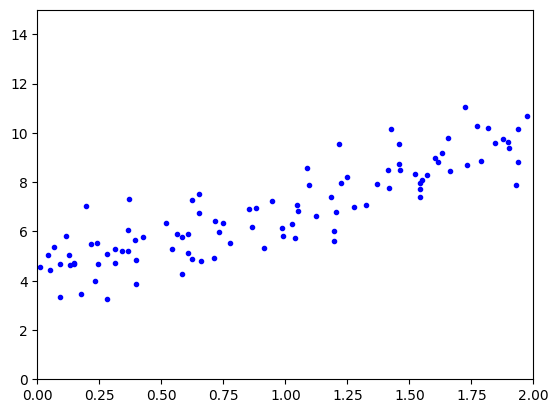

In [ ]:
# 공식 테스트하기 위해 선형처럼 보이는 데이터 생성
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
# np.random.randn(100,1) 가우시안 잡음(표준정규 분포에서 무작위 값을 생성)

plt.plot(X, y, "b.")
plt.axis([0,2, 0,15])
plt.show()

* 정규방정식을 사용해 비용함수를 최소화하는 파라미터(세타 값)를 찾아보자

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

$\hat{\boldsymbol{\theta}}$ **: 비용 함수를 최소화하는 ${\theta}$값**

In [ ]:
# inv(): 역행렬 계산, dot(): 행렬 곱
X_b = np.c_[np.ones((100,1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [ ]:
# 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

In [ ]:
X_new

array([[0.        , 0.        ],
       [0.01603206, 0.        ],
       [0.03206413, 0.        ],
       ...,
       [7.96793587, 3.5       ],
       [7.98396794, 3.5       ],
       [8.        , 3.5       ]])

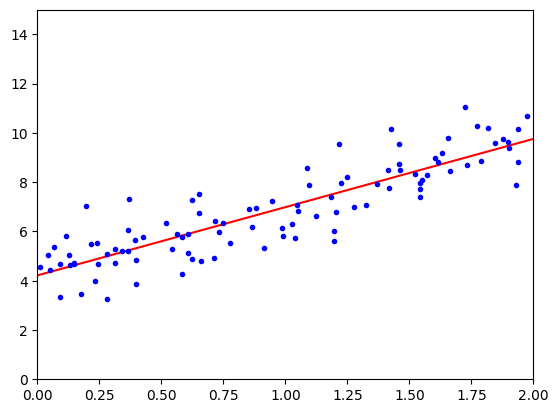

In [ ]:
# 예측을 그래프에 나타내기
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# 편향, 가중치
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

* LinearRegression 클래스는 scipy.linalg.lstsq() 함수(최소 제곱, least squares)를 기반으로 함

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

* 유사역행렬(pseudoinverse) 정확하게는 무어-펜로즈(Moore-Penrose) 역행렬
> * np.linalg.pinv(): 유사역행렬 구하기

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

* 유사역행렬 자체는 특잇값 분해(singular value decomposition, SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산(154p)
> * 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이다
  * 극단적인 경우도 처리 가능하다
  * 실제로 m < n 이거나 어떤 특성이 중복되어 특이 행렬이라면 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다

* 계산 복잡도(computational complexity): 특성 수가 두 배로 늘어나면 계산 시간이 대략 5.3 ~ 8배로 증가한다

* LinearRegression 클래스가 사용하는 SVD 방법은 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다

* 또한 학습된 선형 회귀 모델은 예측이 매우 빠르다
> * 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다
  * 예측하려는 샘플이 두 배로 늘어나면 걸리는 시간도 거의 두 배 증가한다

* 이제 아주 다른 방법으로 선형 회귀 모델을 훈련시켜보자. 이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다

# 4.2 경사 하강법(gradient descent, GD)

* 경사 하강법: 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘

* 그레이디언트: 비용 함수의 미분값

> * 기본 아이디어: 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
  * 짙은 안개 속 산에서 골짜기로 내려가는 가장 좋은 방법: 가장 가파른 길을 따라 내려가는 것
  * 현재 그레이디언트 계산 > 그레이디언트 감소하는 방향으로 진행 > 그레이디언트가 0이 되면 최솟값에 도달한 것
  * 구체적으로 보면 세타(파라미터)를 임의의 값으로 시작해서(무작위 초기화 random initialization 라고 함) 한 번에 조금씩 비용 함수(예, MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴

* 경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률(learning rate)하이퍼파라미터로 결정된다
> * 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다
  * 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 더 높은 곳으로 올라가게 될지도 모름. 이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 함

* 경사 하강법의 두 가지 문제점
> 1. 무작위 초기화 때문에 알고리즘이 전연 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴할 수 있다
  2. 평탄한 지역을 지나게 되면 시간이 오래 걸리고 일찍 몸추게 되어 전역 최솟값에 도달하지 못한다

* 다행히 선형 회귀를 위한 MSE 비용 함수는 볼록 함수(convex function)이라 지역 최솟값이 없고 하나의 전역 최솟값만 있다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다.(기술적으로 말하면 이 함수의 도함수가 립시츠 연속 Lipschitz continuous이) 이 때문에 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장

* 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함.(예, StandardScaler) 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다

* 모델의 파라미터 공간(parameter space에서 찾는다: 비용 함수를 최소화하는 모델 파라미터 조합을 찾는 일
> * 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다



* 배치 경사 하강법

* 경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그레이디언트를 계산해야 한
* 다시 말해 모델 파라미터가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 함. 이를 편도함수(partial derivative)라고 한다(169P)

* 배치 경사 하강법: 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산한다

* 위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다

* 알고리즘 구현


In [ ]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

* 정규방정식으로 찾은 것과 정확히 같다
* 세 가지 다른 학습률을 사용한 경사 하강법의 스텝 10개 그래프

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
        # X_b.dot(theta) : 현재 모델 파라미터로 예측한 값
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

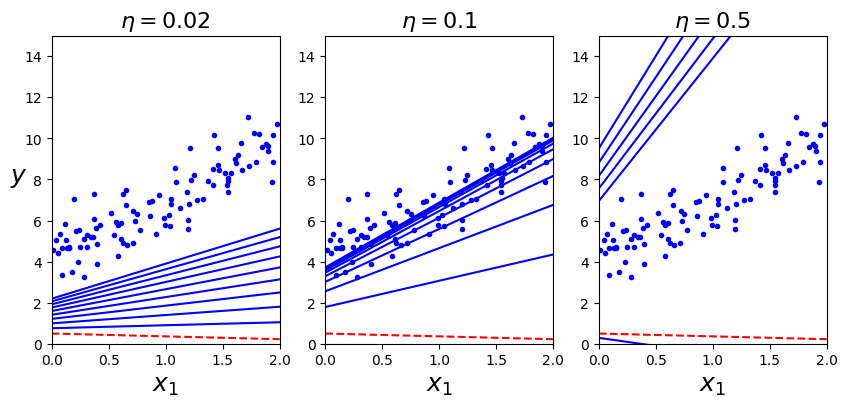

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

#save_fig("gradient_descent_plot")
plt.show()

* 확률적 경사 하강법

* 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산

* 학습 스케줄: 매 반복에서 학습률을 결정하는 함

In [ ]:
# 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

array([[4.20742938],
       [2.74264448]])

In [ ]:
# 훈련 스텝의 첫 20개 그래프
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

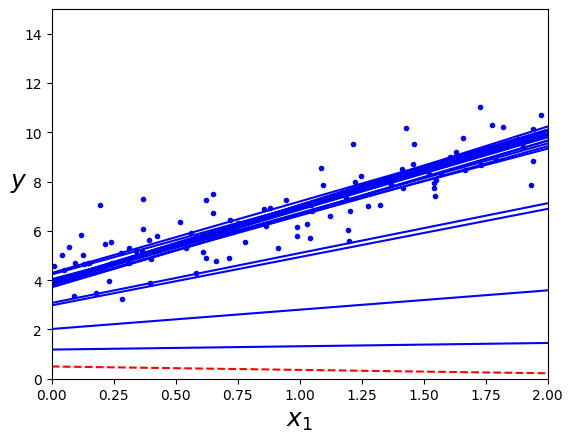

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
#save_fig("sgd_plot")                                 # 책에는 없음
plt.show()                                           # 책에는 없음

* 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 전혀 선택되지 못할 수도 있다

* 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후(입력 특성과 레이블을 동일하게 섞어야 함) 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용 가능하다. 하지만 더 늦게 수렴된다.
> * SGDClassifier와 SGDRegressor가 사용하는 방법

* 확률적 경사 하강법을 사용할 때 훈련 샘플이 IID(independent and identically distributed)를 만족해야 평균적으로 파라미터가 전역 최적점을 향해 진행한다고 보장할 수 있다
> * 이렇게 만드는 간단한 방법은 훈련하는 동안 샘플을 섞는 것

* 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 SGDRegressor 클래스를 사용

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

* 미니배치 경사 하강법
> * 장점: 확률적 경사 하강법에 비해 행렬 연산에 최적화된 하드웨어인 GPU를 사용해서 얻는 성능 향상이 있다
  * SGD보다 덜 불규칙, 따라서 최솟값에 더 가까이 도달. 하지만 지역 최솟값에서 빠져나오기는 더 힘들 수도 있다.

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

* 세 가지 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

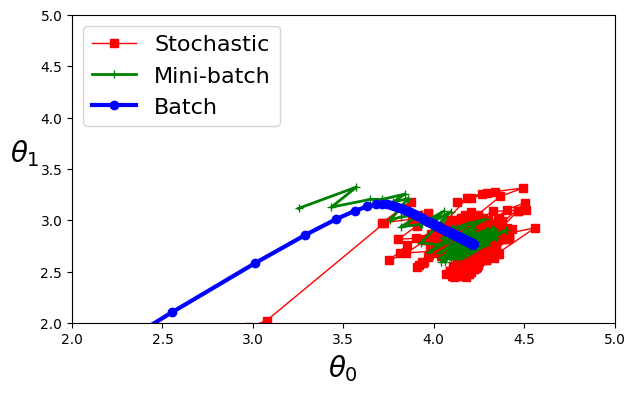

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2, 5, 2, 5])
#save_fig("gradient_descent_paths_plot")
plt.show()

# 4.3 다항 회귀

* 다항 회귀(polynomial regression)
> * 비선형 데이터를 학습하는 데 선형 모델을 사용하는 방법
  * 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것
  

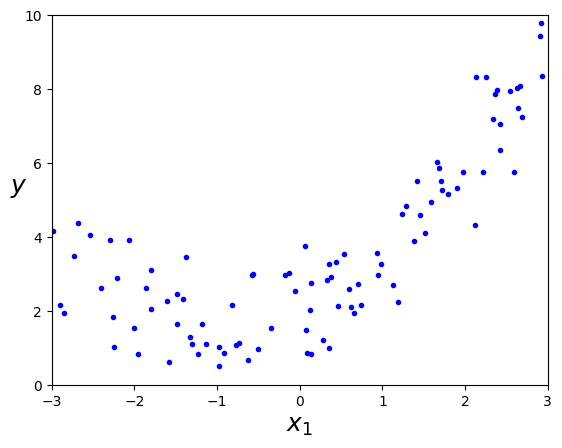

In [ ]:
# 간단한 2차방정식(quadratic equation)으로 비선형 데이터를 생성
# 약간의 잡음 포함
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()

In [ ]:
# PolynomialFeatures 사용해 훈련 데이터 변환
# 각 특성을 제곱하여 새로운 특성으로 추가
# 여기서는 특성 하나가 추가된다
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# degree(차수) 기본값 2, include_bias 기본값 True
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [ ]:
X_poly[0] # 원래 특성 X와 이 특성의 제곱

array([2.38942838, 5.709368  ])

In [ ]:
# LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

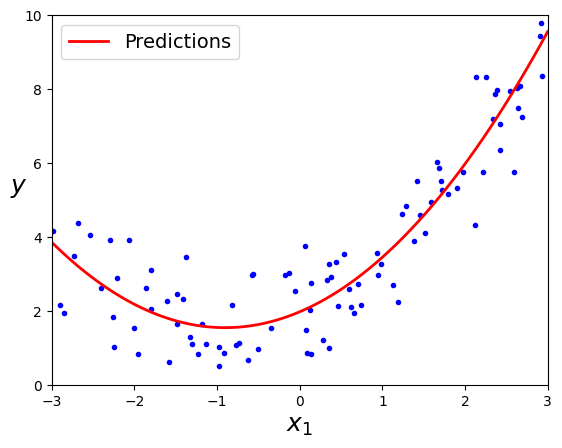

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

* PolynomialFeatures(degree=d)는 n개의 특성에서 0부터 d개까지 뽑을 수 있는 중복 조합의 합이 된다

# 4.4 학습 곡선

* 고차 다항 회귀를 적용하면 보통의 선형 회귀보다 훈련 데이터에 과대적합될 가능성이 높다

* 그렇다면 얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까? 어떻게 모델이 데이터에 과대적합 또는 과소적합되었는지 알 수 있을까?

* 일반화 성능을 추정하기 위해 교차 점증을 사용할 수 있다

* 또 다른 방법은 학습 곡선을 살펴보는 것이다
> * 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(또는 훈련 반복)의 함수로 나타낸다

In [ ]:
# 모델의 학습 곡선을 그리는 함수
# 훈련/검증 세트의 오차를 그
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에

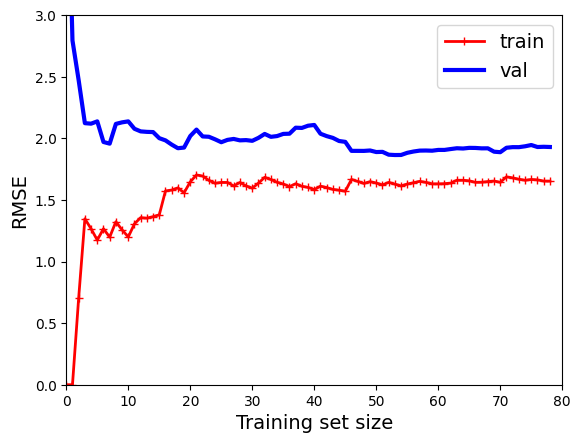

In [ ]:
len_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
#save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()  

* 위 학습 곡선은과소적합 모델의 전형적인 모습

* 모델이 훈련 데이터에 과소적합되어 있다면 훈련 샘플을 더 추가해도 효과가 없다. 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다


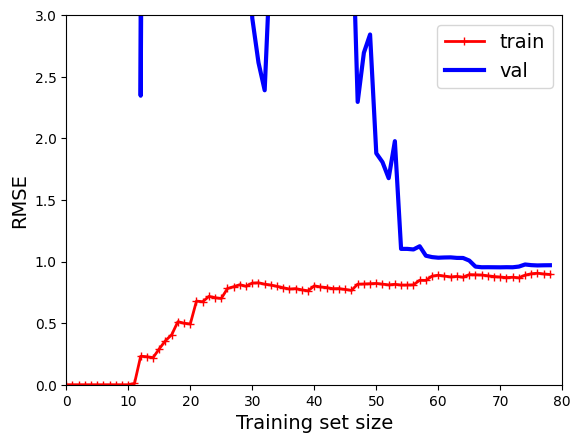

In [ ]:
# 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

* 과대적합 모델을 개선하는 한 방법: 더 많은 훈련 데이터 추가!

* 편향/분산 트레이드오프: 통상적으로 모델의 복잡도가 커지면 분산이 늘어나고 편향이 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다.
* 통계학과 머신러닝에서 나온 중요한 이론 하나: 모델의 일반화 오차는 세 가지 다른 종류의 오차의 합으로 표현할 수 있다는 사실
> * 편향
  * 분산
  * 줄일 수 없는 오차


# 4.5 규제가 있는 선형 모델

* 다항 회귀 모델을 규제하는 간단한 방법: 다항식의 차수를 줄이는 것

* 선현 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가함
> * 릿지 회귀, 라쏘 회귀, 엘라스틱넷

* 릿지(ridge) 회귀
* 규제가 추가된 선형 회귀 버전. 규제항이 비용 함수에 추가된다
> * 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력

* 규제항은 훈련하는 동안에만 비용 함수에 추가되고 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가

* 일반적으로 훈련하는 동안 사용되는 비용 함수와 테스트에서 사용되는 성능 지표는 다르다
> * 이유: 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야 하기 때문
  * 반면 테스트에 사용되는 성능 지표는 최종 목표에 가능한 한 가까워야 함
  * 로그 손실 같은 비용 함수를 사용해서 훈련 시킨 분류기를 평가하는 것이 좋은 예시

* 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터의 스케일을 맞추는 것이 중요하다

In [ ]:
# 정규방정식을 사용한 릿지 회귀를 적용하는 예시
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.13357033]])

In [ ]:
# 확률적 경사 하강법을 사용한 릿지 회귀 적용 예시
sgd_reg = SGDRegressor(penalty="l2")
# penalty= : 사용할 규제를 지
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.11990788])

* 라쏘 회귀
* 라쏘(least absolute shrinkage and selection operator, Lasso) 회귀는 선형 회귀의 또 다른 규제된 버전이다

* 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 것
> * 자동으로 특성 선택을 하고 희소 모델(sparse model)을 만든다

* 라쏘를 사용할 때 경사 하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 함

* 서브그레이디언트 벡터(subgradient vector): 라쏘의 비용 함수의 세타가 0이 되는 지점의 미분가능하지 않은 문제 해결 방법

In [ ]:
# 라쏘 클래스를 사용한 간단한 예제
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
# Lasso 대신 SGDRegressor(penalty="l1") 사용가능

array([5.09481859])

* 엘라스틱넷(elastic net): 릿지 회귀와 라쏘 회귀를 절충한 모델

* 규제항은 단순히 릿지와 회귀의 규제항을 더해서 사용하고, 혼합 정도는 혼합 비율 r을 사용해 조절

* r=0이면 릿지 회귀, r=1이면 라쏘 회귀


* 규제가 없는 선형 회귀, 릿지, 라쏘, 엘라스틱넷을 언제 사용해야하는가?

* 적어도 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 함

* 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 낫다

* 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 엘라스틱넷을 선호한다.

* 라쏘는 특성 수가 샘플 수(n) 보다 많으면 최대 n개의 특성을 선택. 또한 여러 특성이 강하게 연관되어 있으면 이들 중 임의의 특성 하나를 선택.

In [ ]:
# 엘라스틱넷을 사용한 간단한 예제
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09373477])

* 조기 종료(early stopping): 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것

* 제프리 힌턴이 'beautiful free lunch'이라고 불렀다.

* 아래는 예제

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
# 조기 종료를 위한 기본적인 구현 코드
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# 데이터 준비
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

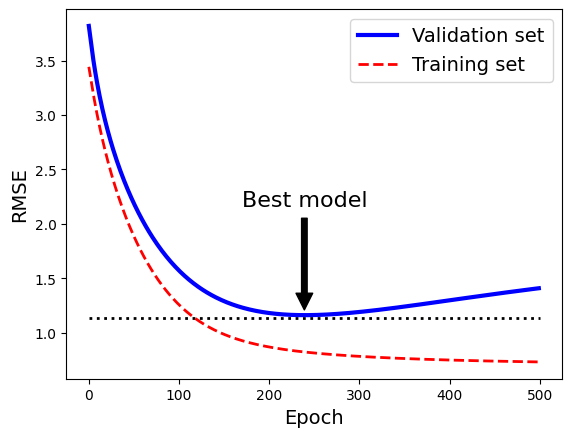

In [ ]:
# 그래프 그리기
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

# 4.6 로지스틱 회귀

* 로지스틱 회귀(logistic regression) 또는 로짓 회귀(logit regression)은 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다

* 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측한다


4.6.1 확률 추정

* 로지스틱 회귀는 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산하고 편향은 더한다. 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결괏값의 로지스틱(logistic)을 출력 


4.6.2 훈련과 비용 함수

* 훈련의 목적: 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것

* 식 4-16: 하나의 훈련 샘플에 대한 비용 함수

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$

* 식 4-17: 로지스틱 회귀 비용 함수(로그 손실)
* 로그 손실(log loss) 또는 로지스틱 손실: 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$


* 식 4-18: 로지스틱 비용 함수의 편도함수

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

4.6.3 결정 경계(decision boundary)

* 로지스틱 회귀 설명 위해 붓꽃 데이터셋 사용 
* 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 만들기 

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, 3:] # 꽃잎의 너비
y = (iris["target"] == 2).astype(int) # Iris-Virginica면 1 ㄱ렇지 않으면 0

In [ ]:
# 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

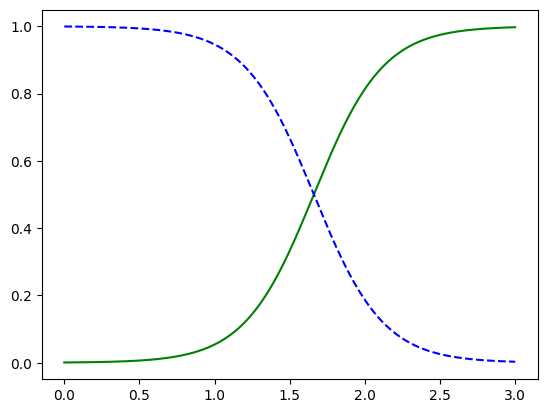

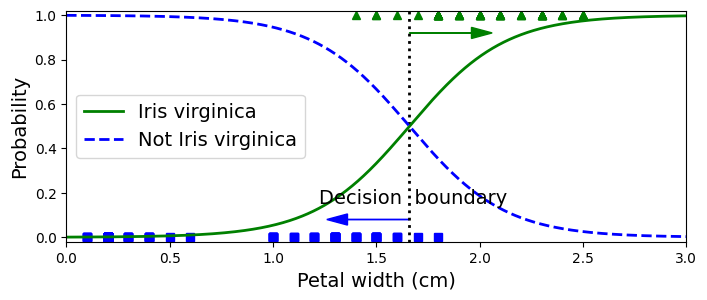

In [ ]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률을 계산
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.show()

# 그래프 이쁘게 그리기
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

* 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어진다

* 꽃잎 너비가 1.6cm 보다 크면 분류기는 양성으로 분류하고, 그보다 작으면 아니라고 예측할 것(아주 확실하지 않더라도)

In [ ]:
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

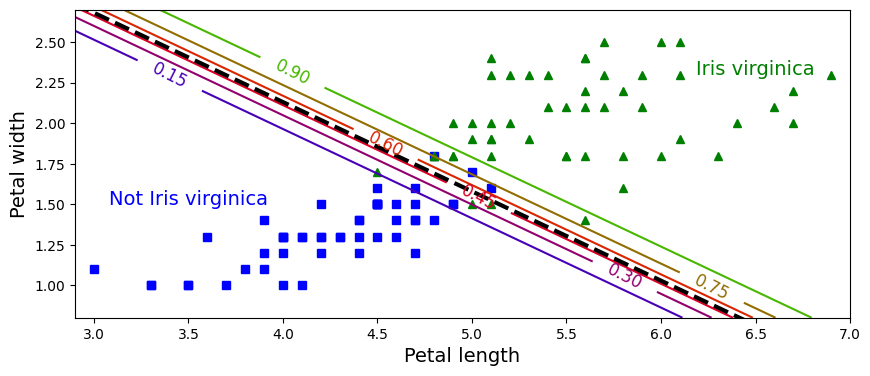

In [ ]:
# 꽃잎 너비와 꽃잎 길이 두 개의 특성으로 보여줌
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

* 사이킷런은 l2 패널티가 기본
* 로지스틱 모델의 규제 강도를 조절하는 하이퍼파라미터는 alpha가 아니라 그 역수인 C이다. C가 높을 수록 규제가 줄어든다 

4.6.4 소프트맥스 회귀

* 소프트맥스 회귀(softmax regression) 또는 다항 로지스틱 회귀(multinomial logistic regression): 다중 클래스를 지원하도록 일반화된 로지스틱 회귀 모델

* 개념: 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수를 계산하고, 그 점수에 소프트맥스 함수(softmax function, 또는 정규화된 지수 함수, normalized exponential function이라고 부름)를 적용하여 각 클래스의 확률을 추정 

* 각 클래스는 자신만의 파라미터 벡터가 있다. 이 벡터들은 파라미터 행렬에 행으로 저장된다 

* 로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스(그냥 가장 높은 점수를 가진 클래스)를 선택한다 

* 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측한다. 다중 출력이 아니다. 


훈련 방법

* 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목표

* 크로스 엔트로피(cross entropy) 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 목적에 부합한다 

* 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다 



* LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다(OvA) 전략을 사용 

* multi_class="multinomial" : 소프트맥스 회귀 사용

* 소프트맥스 회귀를 사용하려면 solver매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함 


In [ ]:
# 소프트맥스 회귀를 사용해 붓꽃을 세 개의 클래스로 분류
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)            

LogisticRegression(C=10, multi_class='multinomial')

* BFGS(Broyden-Fletcher-Goldfarb-Shanno)알고리즘은 의사 뉴턴 메서드(quasi-Newton method) 중 하나이다. 

* L-BFGS(Limited-memory BFGS): BFGS 알고리즘을 제한된 메모리 공간에서 구현한 것으로 머신러닝 분야에서 널리 사용된다 

* 뉴턴 켤레 기울기법(Newton conjugate gradient): newton-cg와 확률적 평균 경사 하강법인 sag가 multinomial 매개변수를 지원 

* 이 세 알고리즘은 l1 규제를 지원하지 않음 

* 사이킷런 0.19 버전에 추가된 saga가 multinomial과 l1, l2 규제를 지원하며 대규모 데이터셋에 가장 적합하다 

In [ ]:
softmax_reg.predict([[5, 2]]) # 꽃잎 길이, 꽃잎 너비

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

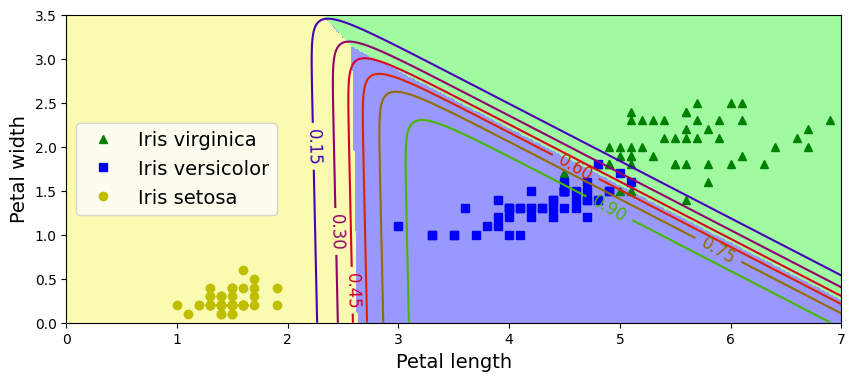

In [ ]:
# 결정 경계를 배경색으로 구분 
# 이 모델이 추정 확률 50% 이하인 클래스를 예측할 수도 있다는 점을 주목
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()